In [1]:
############################################################################
# This notebook is a sample script written to load raw data and 
# display a plot of a single event 
############################################################################

In [23]:
# These three lines are required for import statements to work properly
# Change the append path to point to your scdmsPyTools build location
import sys
sys.path.append("/packages/scdmsPyTools/build/lib/scdmsPyTools/BatTools")
from scdmsPyTools.BatTools.IO import *

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
%matplotlib inline

import pandas as pd

In [3]:
# path to directory containing data files
#filepath='/gpfs/slac/staas/fs1/g/supercdms/data/CDMS/SLAC/R51/Raw/09190321_1522/'
filepath='/gpfs/slac/staas/fs1/g/supercdms/data/CDMS/Soudan/R134/Raw/01140330_0439/'
# specifies series to be analyzed
#series="09190321_1522"
series="01140330_0439"

In [4]:
# loads raw data
ev=getRawEvents(filepath,series)

# print out the first four entries
# this data has traces from a single detector (Z1) and several phonon and charge channels
ev.head(2)

Z1  \
                                                                QIS1   
11403300439 10001  [2259, 2254, 2233, 2245, 2254, 2243, 2234, 225...   
            10002  [2229, 2231, 2254, 2259, 2243, 2221, 2244, 225...   

                                                                      \
                                                                QOS1   
11403300439 10001  [2180, 2175, 2160, 2180, 2187, 2171, 2153, 217...   
            10002  [2161, 2161, 2177, 2178, 2166, 2157, 2181, 216...   

                                                                      \
                                                                PAS1   
11403300439 10001  [2305, 2340, 2339, 2326, 2356, 2340, 2288, 233...   
            10002  [2345, 2354, 2344, 2310, 2295, 2306, 2327, 233...   

                                                                      \
                                                                PBS1   
11403300439 10001  [2223, 2214, 2217, 2206, 2205, 2212, 2220, 222...   
            10002  [2188, 2189, 2193, 2201, 2207, 2211, 2202, 221...   

                                                                      \
                                                                PCS1   
11403300439 10001  [2233, 2236, 2234, 2220, 2212, 2227, 2236, 224...   
            10002  [2233, 2226, 2214, 2215, 2229, 2220, 2210, 221...   

                                                                      \
                                                                PDS1   
11403300439 10001  [2128, 2117, 2124, 2141, 2134, 2125, 2126, 213...   
            10002  [2128, 2130, 2126, 2128, 2114, 2115, 2115, 212...   

                                                                      \
                                                                QIS2   
11403300439 10001  [2107, 2130, 2140, 2132, 2127, 2116, 2125, 212...   
            10002  [2121, 2123, 2125, 2127, 2143, 2161, 2131, 212...   

                                                                      \
                                                                QOS2   
11403300439 10001  [2120, 2123, 2137, 2130, 2126, 2129, 2146, 213...   
            10002  [2133, 2139, 2130, 2127, 2151, 2163, 2129, 212...   

                                                                      \
                                                                PAS2   
11403300439 10001  [2386, 2380, 2379, 2381, 2382, 2380, 2374, 237...   
            10002  [2385, 2388, 2386, 2391, 2392, 2390, 2387, 237...   

                                                                      ...  \
                                                                PBS2  ...   
11403300439 10001  [2153, 2163, 2165, 2168, 2178, 2167, 2157, 216...  ...   
            10002  [2149, 2143, 2161, 2174, 2179, 2175, 2155, 215...  ...   

                                                                 Z15  \
                                                                PAS1   
11403300439 10001  [2323, 2320, 2333, 2339, 2334, 2330, 2326, 233...   
            10002  [2331, 2327, 2328, 2333, 2332, 2326, 2323, 232...   

                                                                      \
                                                                PBS1   
11403300439 10001  [2367, 2379, 2387, 2389, 2384, 2382, 2372, 237...   
            10002  [2374, 2383, 2385, 2391, 2380, 2376, 2383, 237...   

                                                                      \
                                                                PCS1   
11403300439 10001  [2349, 2342, 2333, 2339, 2340, 2343, 2340, 233...   
            10002  [2330, 2334, 2335, 2331, 2329, 2334, 2332, 234...   

                                                                      \
                                                                PDS1   
11403300439 10001  [2245, 2254, 2250, 2238, 2232, 2233, 2242, 223...   
            10002  [2254, 2253, 2247, 2253, 2244, 2242, 2237, 224...   



In [5]:
# there are 3216 events in the loaded data
print ("data table shape:")
print (ev.shape)

data table shape:
(4195, 174)


In [6]:
# what does ev contain?
print (ev.keys())

# specify detector and channel
selectionA=ev['Z5']['PAS1']
selectionB=ev['Z5']['PBS1']
selectionC=ev['Z5']['PCS1']
selectionD=ev['Z5']['PDS1']

MultiIndex(levels=[['Z1', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9'], ['PA', 'PAS1', 'PAS2', 'PB', 'PBS1', 'PBS2', 'PC', 'PCS1', 'PCS2', 'PD', 'PDS1', 'PDS2', 'QI', 'QIS1', 'QIS2', 'QO', 'QOS1', 'QOS2']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [13, 16, 1, 4, 7, 10, 14, 17, 2, 5, 8, 11, 13, 16, 1, 4, 7, 10, 14, 17, 2, 5, 8, 11, 13, 16, 1, 4, 7, 10, 14, 17, 2, 5, 8, 11, 13, 16, 1, 4, 7, 10

In [10]:
# look for an interesting pulse
interesting_idx = []
for idx, event in enumerate(selectionA):
    #print(event)
    is_interesting = np.any(event > 2800)
    
    # print out the index if the event is interesting
    if is_interesting:
        print(idx)
        interesting_idx.append(idx)

503
524
742
786
896
936
937
987
1120
1147
1195
1273
1293
1313
1323
1339
1373
1394
1460
1557
1737
1813
1835
1838
1866
1949
1966
2147
2152
2193
2202
2225
2230
2264
2278
2305
2359
2408
2418
2514
2521
2539
2548
2559
2590
2602
2658
2721
2765
2828
2879
2958
3032
3051
3064
3137
3305
3307
3378
3473
3596
3597
3634
3675


In [11]:
event_idx = 3378 #2559 #2590 #2602 #3032 #1293 #1313 #742
interesting_idx = [interesting_idx[4]]

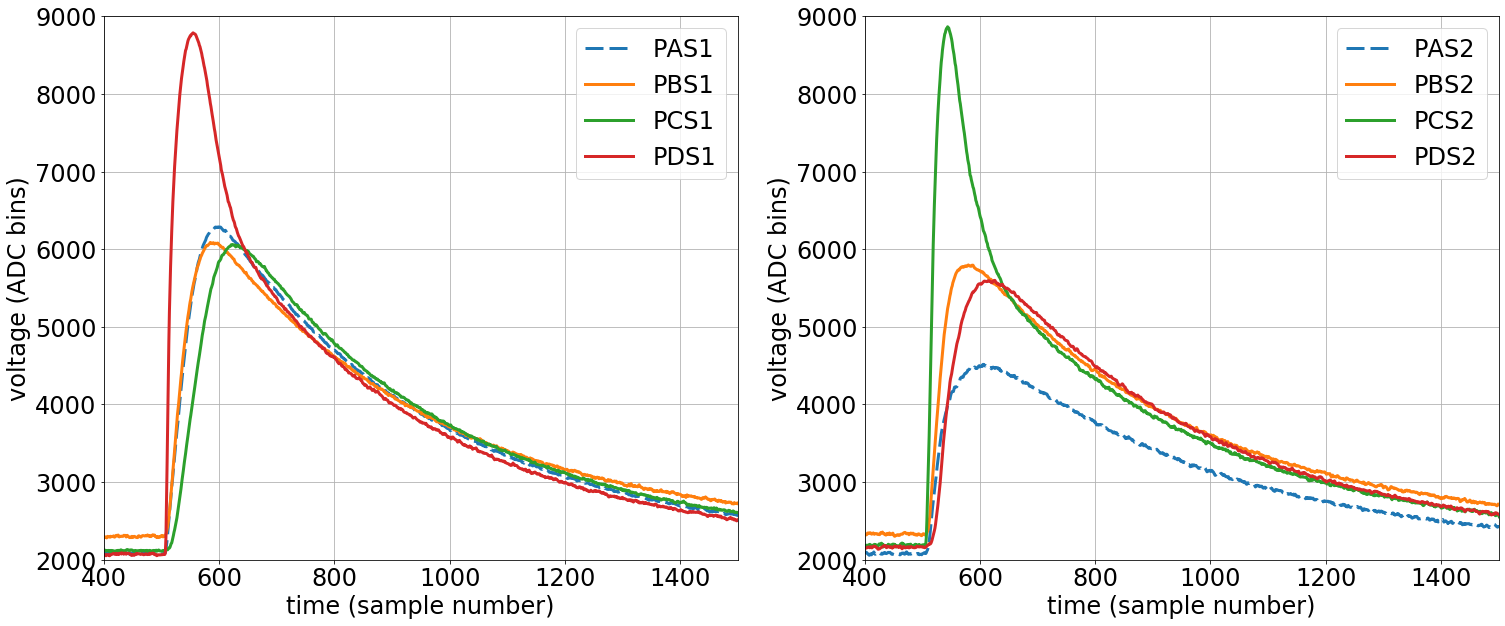

In [30]:
plt.rc('font', size=24)

# Create plot of one event from selected detector and channel
# Plot displays inline, and saves to ./traces.png
for event_idx in interesting_idx:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
    ax1.plot(selectionA[event_idx],label='PAS1', dashes=[6,2], linewidth=3)
    ax1.plot(selectionB[event_idx],label='PBS1', linewidth=3)
    ax1.plot(selectionC[event_idx],label='PCS1', linewidth=3)
    ax1.plot(selectionD[event_idx],label='PDS1', linewidth=3)
    ax1.set_xlim(400, 1500)
    ax1.set_ylim(2000, 9000)
    ax1.grid()
    ax1.set_xlabel("time (sample number)")
    ax1.set_ylabel("voltage (ADC bins)")
    ax1.legend()

    ax2.plot(ev['Z5']['PAS2'][event_idx],label='PAS2', dashes=[6,2], linewidth=3)
    ax2.plot(ev['Z5']['PBS2'][event_idx],label='PBS2', linewidth=3)
    ax2.plot(ev['Z5']['PCS2'][event_idx],label='PCS2', linewidth=3)
    ax2.plot(ev['Z5']['PDS2'][event_idx],label='PDS2', linewidth=3)
    ax2.set_xlim(400, 1500)
    ax2.set_ylim(2000, 9000)
    ax2.grid()
    plt.xlabel("time (sample number)")
    plt.ylabel("voltage (ADC bins)")
    ax2.legend()
    plt.savefig('traces.png')
    
    #plt.title(event_idx)